## CS-E4820 Machine Learning: Advanced Probabilistic Methods (Spring 2023)

Pekka Marttinen, Vishnu Raj, Antti Pöllänen, Nikitin Alexander, Sebastiaan De Peuter, Tommi Gröhn, Julien Martinelli, Ali Khoshvishkaie, Onur Poyraz

## Exercise 7, due on Tuesday March 21 at 23:50.

### Contents
1. Problem 1: ELBO for simple model (1/2)
2. Problem 2: ELBO for simple model (2/2)
3. Problem 3: Bayes factors
4. Problem 4: Model selection for GMM with BIC and cross-validation

# Problem 1: ELBO for the simple model (1/2)
This problem and the next deal with deriving the ELBO for the ‘simple model’, described in the PDF document 'simple_elbo.pdf'. Before doing these exercises, familiarize yourself with the contents of the document.

**(a)** Show that the general formula for ELBO, shown in Equation (8), can be written as the sum shown in Equation (9) for the simple model.

**(b)** Derive the 2nd term $E_{q(\theta)}[log p(\theta)]$ of the ELBO. (**Hint:** recall that $Var(X)=E(X^2)-E(X)^2$).

**(c)** Find out the formula for the 7th term $E_{q(\theta)[log q(\theta)]}$ of the ELBO. (**Hint:** see the 6th term)



Write your answer to Problem 1 here.

**(a)** Show that the general formula for ELBO, shown in Equation (8), can be written as the sum shown in Equation (9) for the simple model.

The general formula for the ELBO shown in Equation (8) is given by

$\mathcal{L}(q)=\int q(\mathbf{Z}) \log \dfrac{p(\mathbf{X}, \mathbf{Z})}{q(\mathbf{Z})} d\mathbf{Z} = E_q[\log p(\mathbf{X},\mathbf{Z})] - E_q[\log q(\mathbf{Z})]$

where $\mathbf{Z}$ is a generic notation that includes all unobservables. In the simple example, the unobservables are the latent variable $\mathbf{z}$ and two hyperparameters $\tau$ and $\theta$. On the other hand, $\mathbf{X}$ is a notation for the observable, which is $\mathbf{x}$ in this case. 

Therefore, the equation can be written specifically for this exercise as:

$\mathcal{L}(q)=E_q[\log p(\mathbf{x}, \mathbf{z}, \tau, \theta)] - E_q[\log q(\mathbf{z}, \tau, \theta)]$ 

According to equation (3) in the simple example, the first term in equation (8) can be written as:

$\log(\mathbf{x},\mathbf{z}, \tau, \theta) = 
\log p(\tau) +
\log p(\theta) + 
\log p(\mathbf{z}|\tau) +
\log p(\mathbf{x}|\mathbf{z}, \theta)$

Derive its expectation by the unobservables and apply the linearity of expectation, we have:

$ E_q[\log p(\mathbf{x}, \mathbf{z}, \tau, \theta)] = E_q[\log p(\tau) +
\log p(\theta) + 
\log p(\mathbf{z}|\tau) +
\log p(\mathbf{x}|\mathbf{z}, \theta)] = 
E_{q(\tau)}[\log p(\tau)] +
E_{q(\theta)}[\log p(\theta)] + 
E_{q(\mathbf{z})q(\tau)}[\log p(\mathbf{z}|\tau)] +
E_{q(\mathbf{z})q(\theta)}[\log p(\mathbf{x}|\mathbf{z}, \theta)] \text{ (i)}
$ 

Additionally, equation (4) in the simple example shows that the second term in equation (8) can be derived using mean-field approximation:

$p(\mathbf{z}, \tau, \theta|\mathbf{x}) \approx q(\tau)q(\theta)\prod_n q(z_n)$

Derive its expectation by the unobservables and apply the linearity of expectation, we have:
$E_q[\log q(\mathbf{z}, \tau, \theta)] 
\approx E_q [\log(q(\tau)q(\theta)\prod_n q(z_n))] 
= E_q [\log q(\tau) + \log q(\theta) + \log q(\mathbf{z}))] 
= E_{q(\mathbf{z})}[\log q(\mathbf{z})] +
E_{q(\tau)}[\log q(\tau)] +
E_{q(\theta)}[\log q(\theta)]  \text{ (ii)}$ 

Replacing (i) and (ii) into equation (8), it can be written as the sum shown in Equation (9):

$\mathcal(q) = 
E_{q(\tau)}[\log p(\tau)] +
E_{q(\theta)}[\log p(\theta)] + 
E_{q(\mathbf{z})q(\tau)}[\log p(\mathbf{z}|\tau)] +
E_{q(\mathbf{z})q(\theta)}[\log p(\mathbf{x}|\mathbf{z}, \theta)] -
E_{q(\mathbf{z})}[\log q(\mathbf{z})] -
E_{q(\tau)}[\log q(\tau)] -
E_{q(\theta)}[\log q(\theta)]   \text{ (proven)}
$ 



**(b)** Derive the 2nd term $E_{q(\theta)}[log p(\theta)]$ of the ELBO. (**Hint:** recall that $Var(X)=E(X^2)-E(X)^2$).

The second term of ELBO is:

$E_q(\theta)[\log p(\theta)] = E_q(\theta) \left[\log\exp\left(-\dfrac{\beta_0}{2} \theta^2\right) \right] $ (according to the prior of $\theta$ in the simple example)

=> $E_q(\theta)[\log p(\theta)] = E_q(\theta) \left[-\dfrac{\beta_0}{2} \theta^2\right] $, where $-\dfrac{\beta_0}{2}$ is independent of $\theta$

=> $E_q(\theta)[\log p(\theta)]= -\dfrac{\beta_0}{2} E_{q(\theta)} [\theta^2]$. According to the hint, $Var(X)=E(X^2)-E(X)^2$ =>  $Var(\theta)=E_{q(\theta)}[\theta^2]-E_{q(\theta)}[\theta]^2$ => $E_{q(\theta)}[\theta^2] = Var(\theta) + E_{q(\theta)}[\theta]^2$

=> $E_q(\theta)[\log p(\theta)] = -\dfrac{\beta_0}{2} [Var(\theta) + E_{q(\theta)} [\theta]^2]$. From equation (7), we have the prior distribution of the factor $\theta$: $q(\theta)=\mathcal{N}(\theta|m_2, \beta_2^{-1})$
                                 
=> $E_q(\theta)[\log p(\theta)] = -\dfrac{\beta_0}{2} [\beta_2^{-1} + m_2^2]$ (answer)

**(c)** Find out the formula for the 7th term $E_{q(\theta)[log q(\theta)]}$ of the ELBO. (**Hint:** see the 6th term)

Because $q(\theta)$ follows a normal distribution $\mathcal{N}(\theta|m_2, \beta_2^{-1})$ => $E_{q(\theta)}\left[\left(\dfrac{\theta - m_2}{\beta_2^{-1/2}}\right)^2 \right]= 1$, by the definition of the normal distribution. Now, we can derive the expectation of the log of normal distribution for $\theta$ as:

$E_{q(\theta)}[\log q(\theta)] = E_{q(\theta)}\left[\log\left(\dfrac{1}{\beta_2^{-1/2}\sqrt{2\pi}} \exp\left(\dfrac{1}{2}\left(\dfrac{\theta - m_2}{\beta_2^{-1/2}}\right)^2\right)\right)\right]$

=> $E_{q(\theta)}[\log q(\theta)] = E_{q(\theta)}\left[\log\left(\dfrac{1}{\beta_2^{-1/2}\sqrt{2\pi}} \right) + \dfrac{1}{2}\left(\dfrac{\theta - m_2}{\beta_2^{-1/2}}\right)^2\right]$

=> $E_{q(\theta)}[\log q(\theta)] = \log\left(\dfrac{\beta_2^{1/2}}{\sqrt{2\pi}} \right) + \dfrac{1}{2} E_{q(\theta)} \left[ \left(\dfrac{\theta - m_2}{\beta_2^{-1/2}}\right)^2\right]$

=> $E_{q(\theta)}[\log q(\theta)] = \dfrac{1}{2} \log \left(\dfrac{\beta_2}{2 \pi}\right) - \dfrac{1}{2}$ (answer)

# Problem 2: ELBO for the simple model (2/2)

**(a)** Derive the 4th term $ E_{q(z)q(\theta)}\left[\log p(x \mid z, \theta)\right]$ of the ELBO. 

**Hint 1**: $E(XY) = E(X)E(Y)$ if X and Y are assumed indendent (see how this is already used in the derivation of term 3). 

**Hint 2**: $E(X-Y) = E(X - a + a - Y)^2$.

**(b)** Implement terms 2, 4, and 7 in the code template given below. Verify that the ELBO increases when you run the VB algorithm.

Write your answer to Problem 2 here.

**(a)** Derive the 4th term $ E_{q(z)q(\theta)}\left[\log p(x \mid z, \theta)\right]$ of the ELBO. 

**Hint 1**: $E(XY) = E(X)E(Y)$ if X and Y are assumed indendent (see how this is already used in the derivation of term 3). 

**Hint 2**: $E(X-Y) = E(X - a + a - Y)^2$.

The probability of this term is equal to the product of the individual probability for each datapoint $x_n$: 

$E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = E_{q(z_n)q(\theta)} [\sum^N_{n=1} \log p(x_n|z_n \theta)]$

According to the first hint, we assume that $x_n$ are independent from each other, so the expectation of the product for each $x_n$ is also the product of the expectation of each $x_n$

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = \sum^N_{n=1}  E_{q(z_n)q(\theta)} [\log p(x_n|z_n \theta)]$

From Round 6 simple example on variational inference in equation (2), line 2, we have:

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = \sum^N_{n=1} E_{q(z_n)q(\theta)} [z_{n1} \log \mathcal{N}(x_n|0,1) + z_{n2} \log \mathcal{N}(x_n|\theta, 1)] 
$. This time there is no constant because the expectation is with respect to all conditional variables, which are $\mathbf{z}$ and $\theta$

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = \sum^N_{n=1} E_{q(z_n)q(\theta)} [z_{n1} \log \mathcal{N}(x_n|0,1)] + E_{q(z_n)q(\theta)}[z_{n2} \log \mathcal{N}(x_n|\theta, 1)] 
$.

We can observe that $z_nk$ and $x_n$ are independent of each other, so the expectation of their product is the product of their expectations

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = \sum^N_{n=1} E_{q(z_n)} [z_{n1}] E_{q(\theta)}[\log \mathcal{N}(x_n|0,1)] + E_{q(z_n)}[z_{n2}] E_{q(\theta)}[\log \mathcal{N}(x_n|\theta, 1)] 
$.

From Round 6 simple example on variational inference in equation (2), line 3

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = \sum^N_{n=1} 
E_{q(z_n)}[z_{n1}] \left(-\dfrac{1}{2}\log(2\pi) - \dfrac{1}{2}x_n^2\right) +
E_{q(z_n)}[z_{n2}] \left(-\dfrac{1}{2}\log(2\pi) - \dfrac{1}{2}E_{q(\theta)}[(x_n-\theta)^2]\right)
$

From Round 6's definition of responsibilities: $r_{nk} = E_{q(z_n)}[z_{nk}]$ 

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = \sum^N_{n=1} 
r_{n1} \left(-\dfrac{1}{2}\log(2\pi) - \dfrac{1}{2}x_n^2\right) +
r_{n2} \left(-\dfrac{1}{2}\log(2\pi) - \dfrac{1}{2}E_{q(\theta)}[(x_n-\theta)^2]\right)
$

According to hint 2: $E(X-Y)^2 = E(X - a + a - Y)^2$. Let a = $m_2$ and replace into $E_{q(\theta)}[(x_n-\theta)^2]$

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = \sum^N_{n=1} 
r_{n1} \left(-\dfrac{1}{2}\log(2\pi) - \dfrac{1}{2}x_n^2\right) +
r_{n2} \left(-\dfrac{1}{2}\log(2\pi) - \dfrac{1}{2}E_{q(\theta)}[(x_n-m_2+m_2-\theta)^2]\right)
$

We need to simplify this term $E_{q(\theta)}[(x_n-m_2+m_2-\theta)^2]$ as follows:

$E_{q(\theta)}[(x_n-m_2+m_2-\theta)^2] = E_{q(\theta)}[(x_n-m_2)^2+ 2(x_n-m_2)(m_2-\theta) + (m_2-\theta)^2] = E_{q(\theta)}[(x_n-m_2)^2] +  E_{q(\theta)}[2(x_n-m_2)(m_2-\theta)] +  E_{q(\theta)}[(m_2-\theta)^2] $

The first term is itself as it is independent of $\theta$ and the second term is zero because $E_{q(\theta)}[\theta] = m_2$ by definition

=> $E_{q(\theta)}[(x_n-m_2+m_2-\theta)^2] = (x_n-m_2)^2 + E_{q(\theta)}[(m_2-\theta)^2]$. Replace this back to the main equation:

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = \sum^N_{n=1} 
r_{n1} \left(-\dfrac{1}{2}\log(2\pi) - \dfrac{1}{2}x_n^2\right) +
r_{n2} \left(-\dfrac{1}{2}\log(2\pi) - \dfrac{1}{2}(x_n-m_2)^2 -\dfrac{1}{2} E_{q(\theta)}[(m_2-\theta)^2]\right)
$



=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = - \dfrac{1}{2} \sum^N_{n=1} 
r_{n1} \left(\log(2\pi) + x_n^2\right) +
r_{n2} \left(\log(2\pi) + (x_n-m_2)^2 + E_{q(\theta)}[(m_2-\theta)^2]\right)
$

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = - \dfrac{1}{2} \sum^N_{n=1} 
(r_{n1}+r_{n2})\log(2\pi) + r_{n1}x_n^2 +
r_{n2} \left((x_n-m_2)^2 + E_{q(\theta)}[(m_2-\theta)^2]\right)
$

The sum of the responsibilities is $r_{n1} + r_{n2} = 1$ and $E_{q(\theta)}[(m_2-\theta)^2]$ is the variance of $\theta$, which is $\beta_2^{-1}$

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = - \dfrac{1}{2} \sum^N_{n=1} 
\log(2\pi) + r_{n1}x_n^2 +
r_{n2} \left((x_n-m_2)^2 + \beta_2^{-1}\right)
$

=> $E_{q(\mathbf{z})q(\theta)} [\log p(\mathbf{x}|\mathbf{z}, \theta)] = -\dfrac{N}{2} \log(2\pi) - \dfrac{1}{2} \sum^N_{n=1} r_{n1} x_n^2 - \dfrac{1}{2} \sum^N_{n=1} r_{n2} \left((x_n - m_2)^2 + \beta_2^{-1}\right)
$ (answer)

**(b)** Implement terms 2, 4, and 7 in the code template given below. Verify that the ELBO increases when you run the VB algorithm.

Write your answer to Problem 2(a) here. 

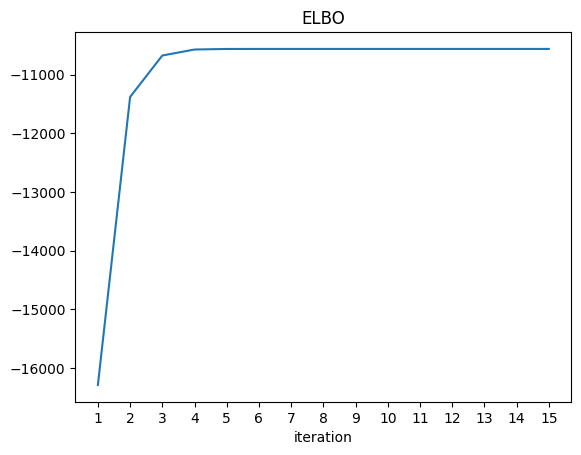

In [1]:
# Template for problem 2(b). 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123123123)

# Compute ELBO for the model described in simple_elbo.pdf
def compute_elbo(alpha_tau, beta_tau, r1, r2, m2, beta2, alpha0, beta0, x):
    
    from scipy.special import psi, gammaln # digamma function, logarithm of gamma function
    
    # E[log p(tau)]
    term1 = (alpha0 - 1) * (psi(alpha_tau) + psi(beta_tau) - 2 * psi(alpha_tau + beta_tau))

    # E[log p(theta)] <???>
    term2 = -(1/2) * beta0 * (m2**2/beta2)
    
    # YOUR CODE HERE
    # raise NotImplementedError()

    # E[log p(z|tau)]
    N2 = np.sum(r2); N1 = np.sum(r1); N = N1 + N2
    term3 = N2 * psi(alpha_tau) + N1 * psi(beta_tau) - N * psi(alpha_tau + beta_tau)

    # E[log p(x|z,theta)] <???>
    term4 = -(1/2) * np.sum(r1 * x**2, axis=0) - (1/2) * np.sum(r2 * ((x-m2)**2 + 1/beta2), axis=0)
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    

    # Negative entropy of q(z)
    term5 = np.sum(r1 * np.log(r1)) + np.sum(r2 * np.log(r2))

    # Negative entropy of q(tau)
    term6 = (gammaln(alpha_tau + beta_tau) - gammaln(alpha_tau) - gammaln(beta_tau)
        + (alpha_tau - 1) * psi(alpha_tau) + (beta_tau - 1) * psi(beta_tau)
        - (alpha_tau + beta_tau - 2) * psi(alpha_tau + beta_tau))

    # Negative entropy of q(theta) <???>
    term7 = (1/2) * np.log(beta2/2*np.pi) - (1/2)
    
    # YOUR CODE HERE
    # raise NotImplementedError()

    elbo = term1 + term2 + term3 + term4 - term5 - term6 - term7
    
    return elbo


# Simulate data
theta_true = 4
tau_true = 0.3
n_samples = 10000
z = (np.random.rand(n_samples) < tau_true)  # True with probability tau_true
x = np.random.randn(n_samples) + z * theta_true

# Parameters of the prior distributions.
alpha0 = 0.5
beta0 = 0.2

n_iter = 15 # The number of iterations
elbo_array = np.zeros(n_iter) # To track the elbo

# Some initial value for the things that will be updated
E_log_tau = -0.7   # E(log(tau))
E_log_tau_c = -0.7  # E(log(1-tau))
E_log_var = 4 * np.ones(n_samples)  # E((x_n-theta)^2)
r2 = 0.5 * np.ones(n_samples)  # Responsibilities of the second cluster.

for i in range(n_iter):
    
    # Updated of responsibilites, factor q(z)
    log_rho1 = E_log_tau_c - 0.5 * np.log(2 * np.pi) - 0.5 * (x ** 2)
    log_rho2 = E_log_tau - 0.5 * np.log(2 * np.pi) - 0.5 * E_log_var
    max_log_rho = np.maximum(log_rho1, log_rho2)  # Normalize to avoid numerical problems when exponentiating.
    rho1 = np.exp(log_rho1 - max_log_rho)
    rho2 = np.exp(log_rho2 - max_log_rho)
    r2 = rho2 / (rho1 + rho2)
    r1 = 1 - r2
    
    N1 = np.sum(r1)
    N2 = np.sum(r2)
    
    # Update of factor q(tau)
    from scipy.special import psi # digamma function
    E_log_tau = psi(N2 + alpha0) - psi(N1 + N2 + 2*alpha0)
    E_log_tau_c = psi(N1 + alpha0) - psi(N1 + N2 + 2*alpha0)
    
    # Update of factor q(theta)
    x2_avg = 1 / N2 * np.sum(r2 * x)
    beta_2 = beta0 + N2
    m2 = 1 / beta_2 * N2 * x2_avg
    E_log_var = (x - m2) ** 2 + 1 / beta_2
    
    # Keep track of the current estimates
    tau_est = (N2 + alpha0) / (N1 + N2 + 2*alpha0)
    theta_est = m2
    
    # Compute ELBO
    alpha_tau = N2 + alpha0
    beta_tau = N1 + alpha0
    elbo_array[i] = compute_elbo(alpha_tau, beta_tau, r1, r2, m2, beta_2, alpha0, beta0, x)

# Plot ELBO as a function of iteration
plt.plot(np.arange(n_iter) + 1, elbo_array)
plt.xticks(np.arange(n_iter) + 1)
plt.xlabel("iteration")
plt.title("ELBO")
plt.show()

From the figure, it appears that the ELBO value increases when the VB algorithm is run.

# Problem 3: Bayes factors
Suppose we have two bags, each containing a large number of black and white marbles. To learn about the contents of the bags, we have done 5 draws from each bag. After each draw, the marble drawn has been returned to the bag. The draws from the first bag are as follows ( B, W, W, B, B ) and the draws from the second bag are ( B, B, B, B, W ) , where B corresponds to a Black marble and W to a White marble. 

Consider two models:

- $M_1$ : the proportions of marbles are the same in the two bags

- $M_2$ : the proportions of marbles are different in the two bags.

**(a)** Write out the two models explicitly. Assuming that a priori all proportions are equally probable, compute the Bayes factor in favor of $M_1$.

**(b)** The same as (a), but now the first set of draws contains 300 black and 200 white draws,
and second set of draws 250 black and 250 white draws.

**Hint**: Beta distribution is the conjugate prior for the Binomial/Bernoulli likelihood, and a uniform proportion corresponds to the $Beta( 1, 1)$ distribution.





Write your answer to Problem 3 here.

**(a)** Write out the two models explicitly. Assuming that a priori all proportions are equally probable, compute the Bayes factor in favor of $M_1$.

This problem can be modeled with the Binomial distribution $Binom(n,p)$, where p is the probability of drawing a certain colored marble from each bag, while n is the number of draws from each bag. In the assignment, it is assume that n is equal for both bags and only p varies between the two models. Additionally, we assume a uniform uniform prior as Beta distribution on the probability of drawing white marbles from the two bags

The first model can be formulated as:

$ p_{M_1} \sim Beta(1,1)$ (prior), where probability of white draws from each bag are equal.

$ x_{i} \sim Binom(n, p_{M_1})$ (likelihood), where the subscript $i \in \{1,2\}$ is the number of black marble draws from each bag. In this case, $p_{M_1}$ is shared between two bags

The second model can be formulated as:

$ p_{M_{2i}} \sim Beta(1,1)$ (prior), where probability of white draws from each bag are different.

$ x_{i} \sim Binom(n, p_{M_{2i}})$ (likelihood), where the subscript $i \in \{1,2\}$ is the number of black marble draws from each bag. In this case, $p_{M_{2i}}$ is different between two bags


The formula in lecture slide 5:

$$ \dfrac{p(M_i|x)}{p(M_j|x)} \text{ Posterior odds} = \dfrac{p(M_i|x)}{p(M_j|x)} \text{ Bayes' factor} \times \dfrac{p(M_i)}{p(M_j)} \text{ Prior odds} $$

The Bayes' factor in favor of $M_1$ is:

$ \dfrac{p(x|M_1)}{p(x|M_2)}$, which is the ratio of marginal likelihoods between the two models. 

First of all, we need to calculate Beta(1,1)

$Beta(\alpha, \beta) = \dfrac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} $. 

=> $p(p_{M_1}) = Beta(1, 1) =  \dfrac{\Gamma(2)}{\Gamma(1)\Gamma(1)} \theta^{0} (1-\theta)^{0} = \dfrac{1}{1} \times 1 \times 1 = 1$

The marginal likelihood for the first model is:

$$ p(x|M_1) = \int^1_0 p(x_1|n, p_{M_1}) p(x_2|n, p_{M_1}) p(p_{M_1}) dp$$

=> $$ p(x|M_1) = \int^1_0 Binom(x_1|n,p) Binom(x_2|n, p) Beta(1,1) dp_{M_1}  $$

=> $$ p(x|M_1) = \int^1_0 \binom{n}{x_1} p_{M_1}^{x_1}(1-p_{M_1})^{n-x_1} \binom{n}{x_2} p_{M_1}^{x_2}(1-p_{M_1})^{n-x_2} \mathbf{1} dp_{M_1}  $$

=> $$ p(x|M_1) = \binom{n}{x_1} \binom{n}{x_2}  \int^1_0  p_{M_1}^{x_1}(1-p_{M_1})^{n-x_1}  p_{M_1}^{x_2}(1-p_{M_1})^{n-x_2} dp_{M_1} $$

=> $$ p(x|M_1) = \binom{n}{x_1} \binom{n}{x_2} \int^1_0  p_{M_1}^{x_1 + x_2}(1-p_{M_1})^{2n-x_1-x_2}  dp_{M_1} $$

This form closely resembles the Beta function (not to be confused with the Beta distribution), where Beta function is defined as:

$$B(z_1, z_2) = \int^1_0 t^{z_1 - 1} (1 - t)^{z^2 - 1} dt  = \dfrac{\Gamma(z_1)\Gamma(z_2)}{\Gamma(z_1 + z_2)} = \dfrac{(z_1 - 1)!(z_2-1)!}{(z_1 + z_2-1)!} $$

=> $$ p(x|M_1) = \binom{n}{x_1} \binom{n}{x_2}  \int^1_0  p_{M_1}^{(x_1 + x_2 + 1) - 1}(1-p_{M_1})^{(2n-x_1-x_2+  1) - 1}  dp_{M_1} $$

=> $$  p(x|M_1) = \binom{n}{x_1} \binom{n}{x_2}  B(x_1+x_2+1,2n-x_1-x_2+1)$$

The marginal likelihood for the second model is:

$$ p(x|M_2) = \int^1_0 p(x_1|n, p_{M_{21}}) p(p_{M_{21}}) dp_{M_{21}} \int^1_0 p(x_2|n, p_{M_{22}}) p(p_{M_{22}})  dp_{M_{22}}$$

=> $$  p(x|M_2) = \int^1_0 Binom(x_1|n, p_{M_{21}}) Beta(1,1) dp_{M_{21}} \int^1_0 Binom(x_2|n, p_{M_{22}}) Beta(1,1) dp_{M_{22}}  $$

=> $$  p(x|M_2) = \int^1_0 \binom{n}{x_1}  p_{M_{21}}^{x_1}(1- p_{M_{21}})^{n-x_1}\mathbf{1} d p_{M_{21}} \int^1_0 \binom{n}{x_2}  p_{M_{22}}^{x_2}(1- p_{M_{22}})^{n-x_2} \mathbf{1} d p_{M_{22}}  $$

=> $$  p(x|M_2) =\binom{n}{x_1} \binom{n}{x_2} \int^1_0  p_{M_{21}}^{x_1}(1- p_{M_{21}})^{n-x_1} d p_{M_{21}} \int^1_0   p_{M_{22}}^{x_2}(1- p_{M_{22}})^{n-x_2} d p_{M_{22}}  $$

Applying the Beta function, we have:

=> $$  p(x|M_2) =\binom{n}{x_1} \binom{n}{x_2} \int^1_0  p_{M_{21}}^{(x_1 + 1) - 1}(1- p_{M_{21}})^{(n-x_1+1)-1} d p_{M_{21}} \int^1_0   p_{M_{22}}^{(x_2+1)-1}(1- p_{M_{22}})^{(n-x_2+1)-1} d p_{M_{22}}  $$

=> $$  p(x|M_2) = \binom{n}{x_1} \binom{n}{x_2} B(x_1+1,n-x_1+1) B(x_2+1, n-x_2+1)  $$

Finally, the Bayes' factor is:

$ \text{Bayes' factor} = \dfrac{p(x|M_1)}{p(x|M_2)} = \dfrac{\binom{n}{x_1} \binom{n}{x_2}  B(x_1+x_2+1,2n-x_1-x_2+1) }{\binom{n}{x_1} \binom{n}{x_2} B(x_1+1,n-x_1+1) B(x_2+1, n-x_2+1) }$

=> $ \dfrac{p(x|M_1)}{p(x|M_2)} = \dfrac{B(x_1+x_2+1,2n-x_1-x_2+1) }{ B(x_1+1,n-x_1+1) B(x_2+1, n-x_2+1) }$



In the problem, we have $n = 5$ for both bags, $x_1 = 3$ (3 black marble draws) for the first bag and $x_2 = 4$ (4 black marble draws) for the second bag. Replace into the Bayes factor equation, we have:

$ \dfrac{p(x|M_1)}{p(x|M_2)} = \dfrac{B(3+4+1,2 \times 5 - 3-4+1) }{ B(3+1,5-3+1) B(4+1, 5-4+1) } = \dfrac{B(8, 4) }{ B(4, 3) B(5, 2)} $

Beta function can be evaluated using online tools such as this link:
https://www.wolframalpha.com/input/?i=beta+function+%283%2C5%29

=> $ \dfrac{p(x|M_1)}{p(x|M_2)} = \dfrac{1/1320}{(1/60)(1/30)} \approx 1.36$

How to interpret the Bayes' factor: When comparing the Bayes factor to 1, a value greater than 1 indicates evidence in favor of Model 1, and a value less than 1 indicates evidence in favor of Model 2. For example, a Bayes' factor of 2 means that the data are twice as likely under Model 1 than under Model 2, providing some evidence in favor of Model 1. On the other hand, a Bayes' factor of 0.5 means that the data are twice as likely under Model 2 than under Model 1, providing evidence in favor of Model 2.

In this exercise, the Bayes factor is 1.36, which supports the idea that model 1 is just slightly more likely than model 2, which is that the proportions of marbles are the same in the two bags. This is reasonable because the samples are small so it is unclear whether the draws come from the underlying bias of the two bags or just due to randomness.

**(b)** The same as (a), but now the first set of draws contains 300 black and 200 white draws,
and second set of draws 250 black and 250 white draws.

In this case, we have $n = 500$ for both bags, $x_1 = 300$ (300 black marble draws) for the first bag and $x_2 = 250$ (250 black marble draws) for the second bag. Replace into the Bayes factor equation, we have:

$ \dfrac{p(x|M_1)}{p(x|M_2)} = \dfrac{B(300+250+1,2 \times 500 - 300-250+1) }{ B(300+1,500-300+1) B(250+1, 500-250+1) } = \dfrac{B(551, 451) }{ B(301, 201) B(251, 251)} $

=> $ \dfrac{p(x|M_1)}{p(x|M_2)} = \dfrac{550!450!}{1001!} \dfrac{501!}{300!200!} \dfrac{501!}{250!250!} \approx 0.0815$

This time, with a much larger draws and the proprotion of draws are different between the two bags, the Bayes' factor is 0.0815, suggesting that Model 2 is 12 times more likely than Model 1, that is the proportions of marbles are different in the two bags.

# Problem 4: Model selection for GMM with BIC and cross validation

In many machine learning applications model selection is crucial. In this exercise, you
will practice two common approaches for model selection: 

- Bayesian Information Criterion (BIC) (as an approximation to ‘Bayesian model selection’) and  

- Cross-Validation (as a representative for a predictive model selection criterion).

You are given a data set (1000 samples of dimension 2) contained in the file data.pickle, which has been sampled from a Gaussian Mixture Model (GMM) using three classes(the true class labels are given for your convenience, but they should not be used in learning the model).

In the given code template below, the data will be divided into training and test sets.

**(a)** Complete the functions 'compute_bic' and 'cross_validate'. Use both criteria to select the number of components in the GMM using the training data. Plot the both the BIC and the validation log-likelihoods as a function of the number of components, as well as the data with the best model. Do both methods find a model with three components as the most likely?

**(b)** Use the selected models to evaluate the test set log-likelihood.

**(c)** Explain briefly the pros and cons of the two approaches and comment which approach you would consider better and why.

**Hint**: What is the total number of parameters needed to specify the component
means and covariance matrices, and the mixture weights? You will need this
number to compute BIC.

part **(a)** and **(b)**

In [2]:
# This Starter code for problem 4. The solution template is in the cell below.
# Tools for learning Gaussian mixture models; adapted from the BRMLtoolkit by David Barber.
import numpy as np
import numpy.matlib as matlib
import numpy.linalg as LA
#import scipy.misc
from scipy.special import logsumexp

def condp(X):
    return X / np.sum(X, axis=0)

def condexp(logp):
    pmax = np.max(logp, axis=0)
    P = logp.shape[0]
    return condp(np.exp(logp - np.tile(pmax, (P, 1))))

def GMMlogp(X, H, P, m, S):
    D, N = X.shape  # dimension and number of points

    logp = np.zeros((N, H))
    for i in range(H):
        invSi = LA.inv(S[i,:,:])
        sign, logdetSi = LA.slogdet(2 * np.pi * S[i,:,:])

        for n in range(N):
            v = X[:,n] - m[:,i]
            logp[n,i] = -0.5 * (v @ invSi @ v) - 0.5 * logdetSi + np.log(P[i])

    return logp



# Log Likelihood of data X under a Gaussian Mixture Model
#
# X : each column of X is a datapoint.
# P : mixture coefficients
# m : means
# S : covariances
#
# Returns: A list containing the log likelihood for each data point in X
def GMMloglik(X, P, m, S):
    N = X.shape[1]
    H = m.shape[1]

    logp = GMMlogp(X, H, P, m, S)
    logl = [logsumexp(a=logp[n,:], b=np.ones(H)) for n in range(N)]

    return logl

# Fit a mixture of Gaussian to the data X using EM
#
# X : each column of X is a datapoint.
# H : number of components of the mixture.
# n_iter : number of EM iterations
#
# Returns: (P, m, S, loglik, phgn)
# P : learned mixture coefficients
# m : learned means
# S : learned covariances
# loglik : log likelihood of the learned model
# phgn : mixture assignment probabilities
def GMMem(X, H, n_iter):
    D, N = X.shape  # dimension and number of points

    # initialise the centres to random datapoints
    r = np.random.permutation(N)
    m = X[:, r[:H]]

    # initialise the variances to be large
    s2 = np.mean(np.diag(np.cov(X)))
    S = matlib.tile(s2 * np.eye(D), [H, 1, 1])

    # intialise the component probilities to be uniform
    P = np.ones(H) / H

    for emloop in range(n_iter):
        # E-step:
        logpold = GMMlogp(X, H, P, m, S)

        phgn = condexp(logpold.T)  # responsibilities
        pngh = condp(phgn.T)       # membership

        # M-step:
        for i in range(H):   # now get the new parameters for each component
            tmp = (X - np.tile(m[:,i:i+1], N)) * np.tile(np.sqrt(pngh[:,i]), (D,1))
            Scand = np.dot(tmp, tmp.T)

            if LA.det(Scand) > 0.0001:   # don't accept too low determinant
                S[i,:,:] = Scand

        m = np.dot(X, pngh)
        P = np.sum(phgn, axis=1) / N

    logl = np.sum(logsumexp(a=logpold[n,:], b=np.ones(H)) for n in range(N))

    return P, m, S, logl, phgn

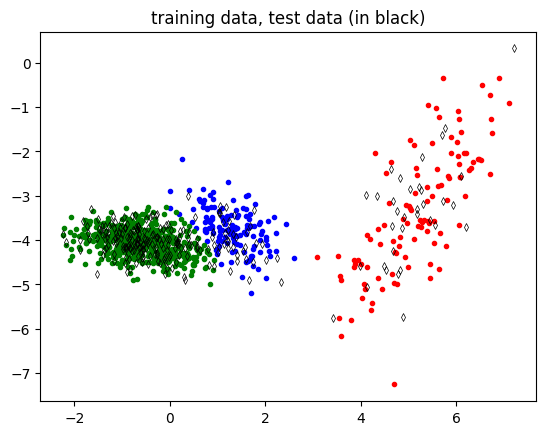

computing cross validation score
H: 1


C:\Users\springnuance\AppData\Local\Temp\ipykernel_15904\479152007.py:94: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  logl = np.sum(logsumexp(a=logpold[n,:], b=np.ones(H)) for n in range(N))


H: 2
H: 3
H: 4
H: 5
The weights of BIC for corresponding H = [1;2;3;4;5] is [-469.51125982 -357.09590582 -338.04736139 -339.17130628 -340.02560895]


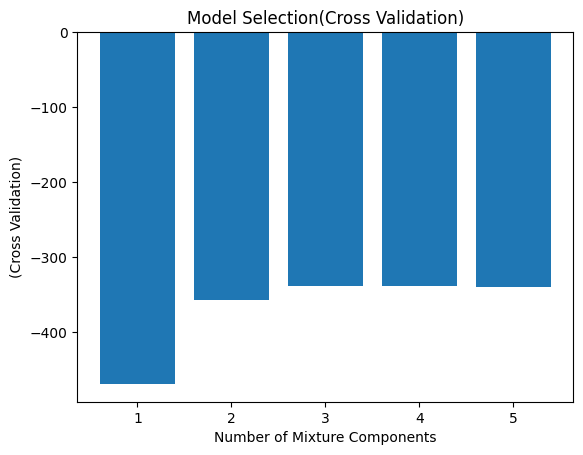

Test Data Likelihood = -529.653042


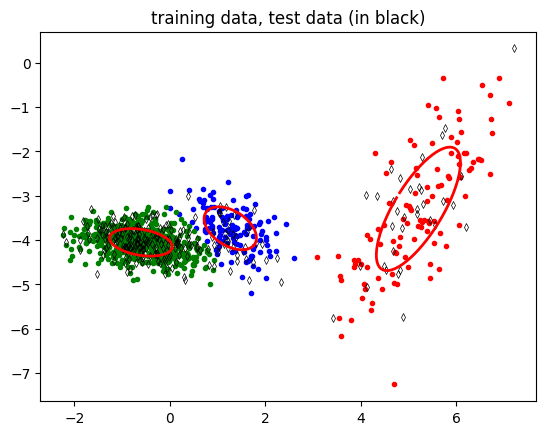

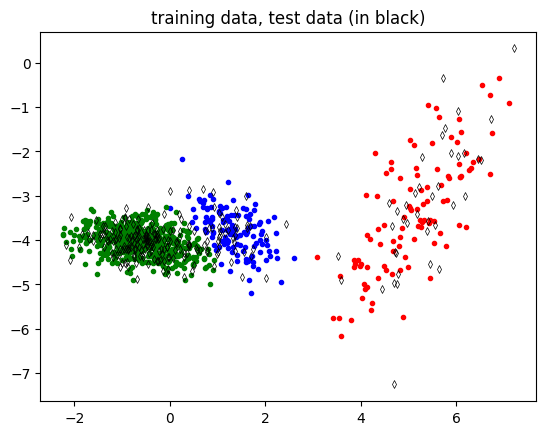

computing BIC
H: 1
The number of parameters for BIC, H = 1: k = 5.0
H: 2
The number of parameters for BIC, H = 2: k = 11.0
H: 3
The number of parameters for BIC, H = 3: k = 17.0
H: 4
The number of parameters for BIC, H = 4: k = 23.0
H: 5
The number of parameters for BIC, H = 5: k = 29.0


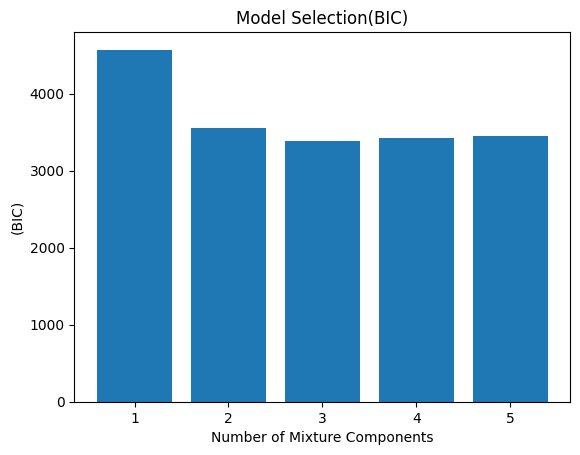

Test Data Likelihood = -804.300366


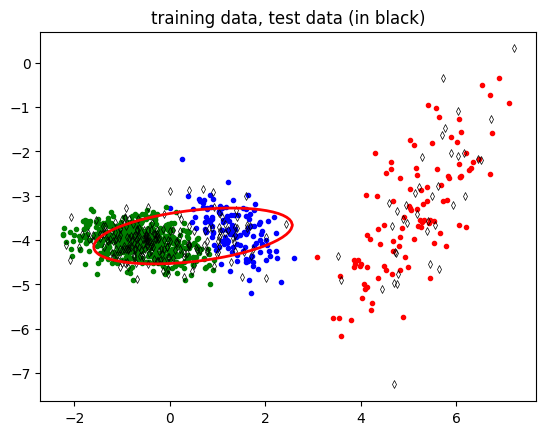

In [4]:
# Template for problem 4
import matplotlib.pyplot as plt
import pickle

np.random.seed(0)
totalComponents = 5  # max number of mixture components
#criterion_flag = [0, 1]    # 0: cross validation, 1: BIC
for criterion_flag in [0, 1]:
    def compute_bic(Xtrain):
        BICs = []
        for H in range(1, totalComponents+1):    # number of mixture components
            print("H: {}".format(H))

            P, m, S, loglik, phgn = GMMem(Xtrain, H, 100)  # fit to data

            # numParams = ?     # number of parameters in the model
            # BIC = ?           # BIC for the model

            # https://en.wikipedia.org/wiki/Bayesian_information_criterion
            # https://stats.stackexchange.com/questions/229293/the-number-of-parameters-in-gaussian-mixture-model
            # BIC = k*ln(n) - 2ln(L)
            # where ln(L) is the maximum log likelihood
            # n is the number of datapoints in x
            # p is the number of features in x
            # k is the number of parameters estimated by the model
            D, N = Xtrain.shape
            df = (D * D - D)/2 + 2 * D + 1 # degree of freedom
            k = H * df - 1
            BIC = k*np.log(N) - 2*loglik
            print(f"The number of parameters for BIC, H = {H}: k = {k}")

            # YOUR CODE HERE
            #raise NotImplementedError()

            BICs.append(BIC)
        return BICs

    def cross_validate(Xtrain):
        foldCount = 5    # number of folds

        loglik = np.zeros((totalComponents, foldCount))

        Nlearning = Xtrain.shape[1]
        order = np.random.permutation(Nlearning)    # to randomize the sample order

        for H in range(1, totalComponents+1):     # number of mixture components
            print("H: {}".format(H))

            for fold in range(foldCount):    # K-fold cross validation (K=5)
                ind = fold * int(Nlearning/foldCount) + np.arange(int(Nlearning/foldCount))
                val_indices = order[ind]

                training_indices = np.setdiff1d(np.arange(Nlearning), val_indices);

                X_train = Xtrain[:,training_indices]  # cv training data
                X_val   = Xtrain[:,val_indices]       # cv validation data

                # train model
                P1, m1, S1, loglik1, phgn1 = GMMem(X_train, H, 100)   # fit model

                # Predict using the cv trained model
                # logl1 = ?
                # loglik[H-1,fold] = ?
                loglikelihood = GMMloglik(X_val, P1, m1, S1)
                loglik[H-1,fold] = np.sum(loglikelihood)
                # YOUR CODE HERE
                #raise NotImplementedError()
        return loglik


    # load data
    with open("../coursedata/data.pickle", "rb") as f:
        X, labels = pickle.load(f)

    D, N = X.shape   # dimension and number of data points

    ratio = 0.75
    train_ind = np.random.choice(N, int(ratio * N), replace=False)   # training data index
    test_ind = np.setdiff1d(np.arange(N), train_ind)                 # test data index

    Xtrain = X[:,train_ind]            # training data
    Xtrain_labels = labels[train_ind]  # training data labels

    Xtest = X[:,test_ind]            # test data
    Xtest_labels = labels[test_ind]  # test data labels

    # plot training and test data
    def plot_data():
        for i in sorted(set(Xtrain_labels)):
            X_comp = Xtrain[:, Xtrain_labels == i]
            plt.plot(X_comp[0], X_comp[1], '.' + 'brgmcyk'[i-1], markersize=6)

        plt.plot(Xtest[0], Xtest[1], 'kd', markersize=4, markeredgewidth=0.5, markerfacecolor="None")

    plot_data()
    plt.title('training data, test data (in black)')
    plt.show()



    # ***** Use BIC to select the number of components
    # (Only this part differs from the second template, where cross validation is used instead)

    if criterion_flag:
        print('computing BIC')
        scores = compute_bic(Xtrain)
        ylabel = "(BIC)"
    elif not criterion_flag:
        print('computing cross validation score')
        scores = cross_validate(Xtrain)
        ylabel = "(Cross Validation)"

    # plot the BIC curve
    if criterion_flag:
        scores = np.array(scores).reshape(-1, 1)
    plt.bar(np.arange(1, totalComponents+1), np.mean(scores, axis=1))
    if not criterion_flag:
        print(f"The weights of BIC for corresponding H = [1;2;3;4;5] is {np.mean(scores, axis=1)}")
    #plt.yscale("log", nonposy="clip")
    plt.xlabel('Number of Mixture Components')
    plt.ylabel(ylabel)
    plt.title('Model Selection' + ylabel )
    plt.show()

    # select the number of mixture components which minimizes the BIC
    h = np.argmax(np.mean(scores, axis=1)) + 1



    # ***** TRAIN

    # Now train full model with selected number of mixture components
    P, m, S, loglik, phgn = GMMem(Xtrain, h, 100)  # fit to data

    # Predict using the full trained model (Use GMMem.GMMloglik)
    # logl = ?
    # print('Test Data Likelihood = {0:f}'.format(?))

    loglikelihood = GMMloglik(Xtest, P, m, S)
    print('Test Data Likelihood = {0:f}'.format(np.sum(loglikelihood)))

    # YOUR CODE HERE
    #raise NotImplementedError()

    # Plot the best GMM model
    plot_data()

    for i in range(h):
        dV, E = LA.eig(S[i,:,:])

        theta = np.arange(0, 2*np.pi, 0.1)
        p = np.sqrt(dV.reshape(D,1)) * [np.cos(theta), np.sin(theta)]
        x = (E @ p) + np.tile(m[:,i:i+1], (1, len(theta)))

        plt.plot(x[0], x[1], 'r-', linewidth=2)

    plt.title('training data, test data (in black)')
    plt.show()

**(c)** Explain briefly the pros and cons of the two approaches and comment which approach you would consider better and why.

**Hint**: What is the total number of parameters needed to specify the component
means and covariance matrices, and the mixture weights? You will need this
number to compute BIC.

From the two figures, the approach that I would consider better is the cross validation (CV) method. This can be verified visually, as the data seems to be distributed in three normal distributions. 

The reason is that BIC penalizes the model if the number of paramaters increase. This can be see from the printed message above, so BIC would prefer to have the the most simple model possible. Therefore, CV seems to perform better than BIC because CV does not consider the model complexity